In [1]:
import pandas as pd

In [2]:
data = pd.read_csv( r'C:\Users\ayush\OneDrive\Desktop\WORK\Internship\Accredian\Fraud.csv' )

In [3]:
# Fraud.csv dataset
data 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
# total numbers of missing values in each columns
data.isnull().value_counts()

step   type   amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
False  False  False   False     False          False           False     False           False           False    False             6362620
Name: count, dtype: int64

In [5]:
# check for duplicates
data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

In [6]:
# return column names with their datatypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# Provides essential statistical insights that can be helpful for identifying potential issues, such as outliers
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
data['isFraud'].describe()

count    6.362620e+06
mean     1.290820e-03
std      3.590480e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: isFraud, dtype: float64

In [9]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
# Print the count of samples where nameDept starts with 'M'
nameDest_startsWithM = data[data['nameDest'].str.startswith('M')].shape[0]
nameDest_startsWithM 

2151495

In [11]:
# Print the count of samples where nameOrig starts with 'M'
nameOrig_startsWithM = data[data['nameOrig'].str.startswith('M')].shape[0]
nameOrig_startsWithM 

0

In [12]:
def le_nameDest(nameDest):
    if nameDest.startswith('M'):
        return 0
    else:
        return 1

data['nameDest_encoded'] = data['nameDest'].apply(le_nameDest)

In [13]:
# Print the updated dataframe
print(data[['nameDest', 'nameDest_encoded']])

            nameDest  nameDest_encoded
0        M1979787155                 0
1        M2044282225                 0
2         C553264065                 1
3          C38997010                 1
4        M1230701703                 0
...              ...               ...
6362615   C776919290                 1
6362616  C1881841831                 1
6362617  C1365125890                 1
6362618  C2080388513                 1
6362619   C873221189                 1

[6362620 rows x 2 columns]


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['type_encoded'] = le.fit_transform(data['type'])

In [15]:
# Print the updated dataframe
print(data[['type', 'type_encoded']])

             type  type_encoded
0         PAYMENT             3
1         PAYMENT             3
2        TRANSFER             4
3        CASH_OUT             1
4         PAYMENT             3
...           ...           ...
6362615  CASH_OUT             1
6362616  TRANSFER             4
6362617  CASH_OUT             1
6362618  TRANSFER             4
6362619  CASH_OUT             1

[6362620 rows x 2 columns]


In [16]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_encoded,type_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,3
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,3
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,4
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,3


In [17]:
data.columns.tolist()

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud',
 'nameDest_encoded',
 'type_encoded']

In [18]:
X = data[['step',
     'amount',
     'type_encoded',
     'oldbalanceOrg',
     'newbalanceOrig',
     'nameDest_encoded',
     'oldbalanceDest',
     'newbalanceDest',
     'isFlaggedFraud']]
y =  data['isFraud']

In [19]:
X.sample(5)

,step,amount,type_encoded,oldbalanceOrg,newbalanceOrig,nameDest_encoded,oldbalanceDest,newbalanceDest,isFlaggedFraud
533018,20,91417.29,1,0.0,0.00,1,1574239.43,1665656.72,0
1167408,132,180674.78,1,185575.0,4900.22,1,13061.10,193735.87,0
3153868,237,134153.45,1,0.0,0.00,1,1005366.09,1139519.53,0
5227715,370,12782.74,3,0.0,0.00,0,0.00,0.00,0
4475397,324,1194.49,3,162.0,0.00,0,0.00,0.00,0


In [20]:
y.sample(5)

1358937    0
5128977    0
2675508    0
2121696    0
161161     0
Name: isFraud, dtype: int64

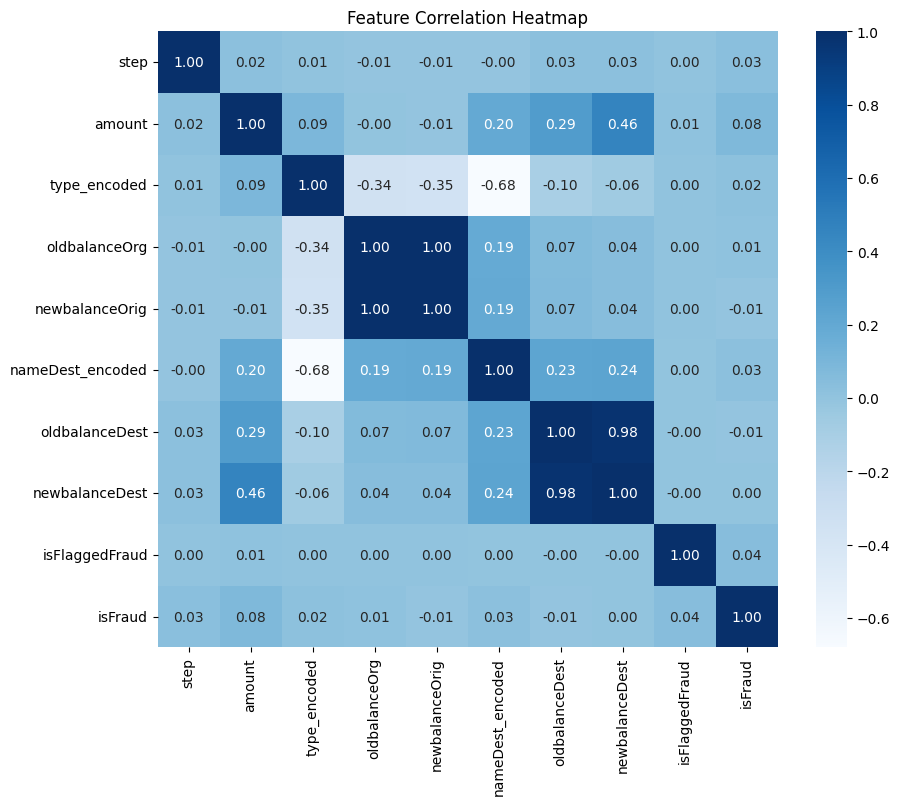

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate X and y into a single dataframe for calcualting correlation
data_corr = pd.concat([X, y], axis=1)

# Calculate correlation matrix
correlation_matrix = data_corr.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix , annot=True , cmap='Blues', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [23]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, 
                             random_state=None, verbose=0, warm_start=False, class_weight="balanced", ccp_alpha=0.0, max_samples=None)

RFC.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=20)

In [24]:
y_pred = RFC.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

# Calculates the accuracy
acc = accuracy_score(y_test, y_pred)

# Print accuracy score
acc

0.9997021667174844

In [37]:
from sklearn.metrics import classification_report

# Generates classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.79      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

